
**Ques1**:-Using one of the visualisation techniques discussed in the lectures, plot the 4-D data. (Hint: you may
find that you need to adjust some parameter(s) for your plot to be legible; if so please do it.). The four
dimensions are not all independent of one another. How does this manifest itself on your plot? itself on your plot?

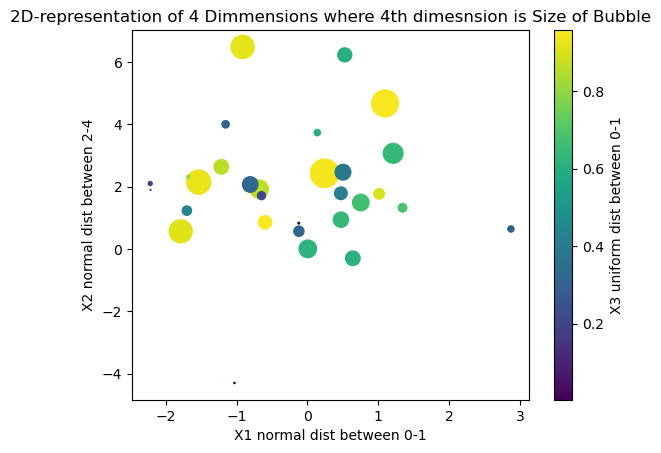

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Set a random seed for reproducibility
np.random.seed(12)

# Sample data for 30 points
n_samples = 30

#Assign the values to the four dimensions as mentioned in the question
x1 = norm.rvs(loc=0, scale=1, size=n_samples)
x2 = norm.rvs(loc=2, scale=2, size=n_samples)
x3 = uniform.rvs(loc=0, scale=1, size=n_samples)
z = uniform.rvs(loc=0, scale=1, size=n_samples)
x4 = x3 * z

#Using colors as 3rd dimension
colors=x3

#Multiplying the sizes by 500 so that they are clearly visible on the graph
sizes=500*x4

# Create a scatter plot where 3rd dimension is color and 4th dimension is size of the bubble
plt.scatter(x1,x2,c=colors,s=sizes,alpha=1)
plt.colorbar(label="X3 uniform dist between 0-1")
plt.xlabel("X1 normal dist between 0-1")
plt.ylabel("X2 normal dist between 2-4")
plt.title("2D-representation of 4 Dimmensions where 4th dimesnsion is Size of Bubble")
plt.show();


In the above plotted graph I have plotted the first 2 dimensions X1,X2 on x & y axis respectively, from the graph it is clear that these 2 dimensions are independent, however as X4 itself is nothing but X3 multiplied by z where z= uniform(0,1) therefore they are dependent. As it can be seen from the above graph the colors are asssociated with values of X3 as seen on the colorbar, we can see that as the value of X3 increases size of bubble also increases which mean values of X4 also increases, hence they are somewhat propotional to each other

**Ques2:** - Display a QQ plot for the following probability measures: the standard normal
distribution(0, 1) on the x-axis and the standard Cauchy distribution Cauchy(0, 1) on the y-axis. What does
the QQ plot tell us about the tails of these distributions

In [73]:
import scipy.stats as stats

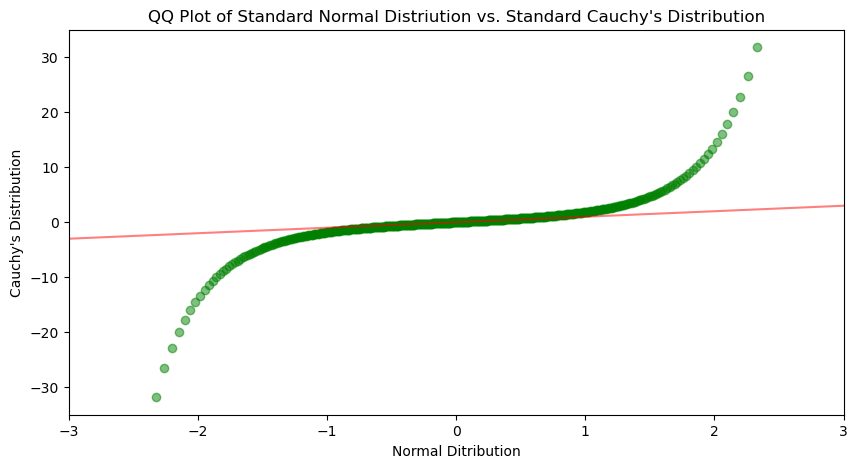

In [74]:
#Desciding the numeber of samples of sample points within a specific range
samples = np.linspace(0.01,0.99,500)

#Taking the points for both the distribution for above samples
norm = stats.norm.ppf(samples, loc=0, scale=1)
cauchy = stats.cauchy.ppf(samples, loc=0, scale=1)

#Plot the QQ plot for both distributions
plt.figure(figsize=(10, 5))
plt.scatter(norm, cauchy, color = 'g', alpha =0.5)
plt.xlim(-3,3)

plt.xlabel("Normal Ditribution")
plt.ylabel("Cauchy's Distribution")

#Taking a Reference line for the above graph
plt.plot([-3,3],[-3,3], color = 'r',alpha=0.5)
plt.title("QQ Plot of Standard Normal Distriution vs. Standard Cauchy's Distribution")
plt.show()


For thabove graphon, the data points deviate significantly from the diagonal line. This indicates that the tails of the standard Cauchy distribution are much heavier than those of the standard normal distribution. The Cauchy distribution lacks finite moments, which is evident from the QQ plot as it doesn't match the straight line in the tails.

**Ques3:**- Recall from the lectures that if we have
two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum1
P1 + P2 is given by the convolution of the two densities, viz.
f1+2(t) = Z ∞
−∞
f1(x)f2(t − x) dx.
In this question we consider the sum of Beta (2, 8) + Beta (8, 2). What is the support of Beta (2, 8)? What
is the support of Beta (8, 2)? Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?
Write a function which implements the integrand of the integral above, that is to say that implements
f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2). (Hint: this function
will need two arguments.)
Next, generate 100 points (t1, . . . , t100) along the support of Beta (2, 8) + Beta (8, 2) (using numpy’s
linspace function), and using a for loop, compute the pdf f1+2(ti) at these 100 points using quad.
(Hint: the documentation of quad has an example showing how to integrate a function with two arguments
along its first argument.) Plot your result.
Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the
histogram of these sums along with the pdf computed in the previous step. What do you observe?

In [75]:
from scipy.integrate import quad
from scipy.stats import expon
from scipy.stats import beta

In [76]:
#Defining the function which implements the integrand of the integral mentioned in question
def beta_integrand(x, t):
    beta1= beta.pdf(x,2,8)
    beta2= beta.pdf(t-x,8,2)
    return beta1*beta2

In [77]:
#Generating the number of samples for the support sum
x = np.linspace(0,2,100)

#Declaring a list to store the PDFS for all the samples defined above
pdf_vals = []

#iterating the sample space to calculate the sum of 2 beta functions
for t in x :
    a = quad(beta_integrand,0,2,args=(t,))
    pdf_vals.append(a)

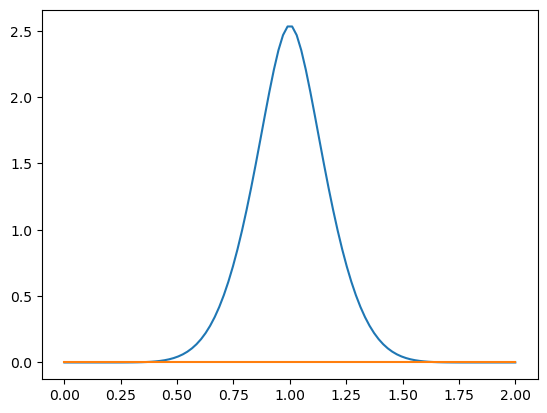

In [78]:
#plotting the graph
plt.plot(x,pdf_vals)
plt.show()

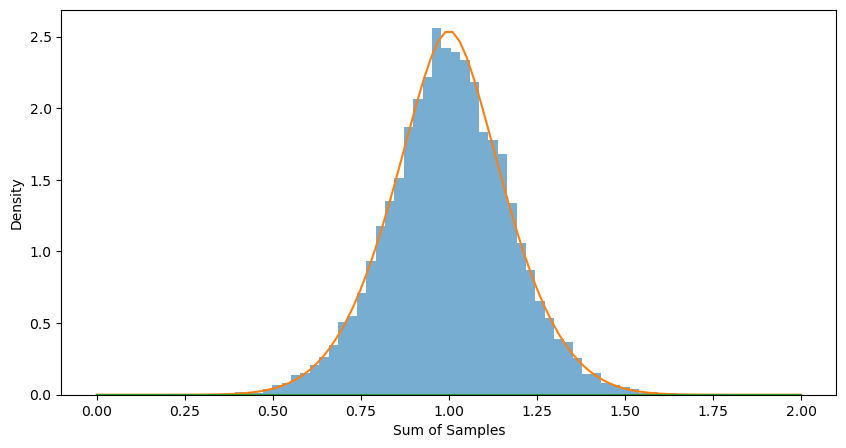

In [79]:
#Taking the random sample points for the 2 beta functions
samples1 = beta.rvs(2, 8, size=10000)
samples2 = beta.rvs(8, 2, size=10000)
#Taking the sum of above samples
sum_samples = samples1 + samples2

plt.figure(figsize=(10,5))
#plotting the histograms of above sum of samples
plt.hist(sum_samples, density=True, bins=50, alpha=0.6)
#plotting the graph of PDFs calculated above
plt.plot(x, pdf_vals)
plt.xlabel('Sum of Samples')
plt.ylabel('Density')
plt.show()


The support for Beta(2,8) is [0,1] and support for Beta(8,2) is [0,1] hence the support of sum of two beta function will be sum of support i.e. [0,2].
After plotting the sum of pdf of Beta functions against the histogram of sums of samples we can observe that both are giving approximately same results  This demonstrates that the sum of two random variables following Beta (2, 8) and Beta (8, 2) distributions results in a distribution with a shape similar to the PDF computed using the integral.

**Ques4(a):**-Write a function called sample_mean taking as inputs two integers m and n. The function should
return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000),
sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for
each of these outputs.


In [80]:
import statistics as stats
from scipy.stats import norm
import matplotlib.pyplot as plot

#Defining sample mean function to calculate mean 
def sample_mean(m,n):
    l= np.zeros(n)
    for i in range(n):
        x= np.random.standard_normal(size=m)
        l[i]=stats.mean(x)
    return l
    

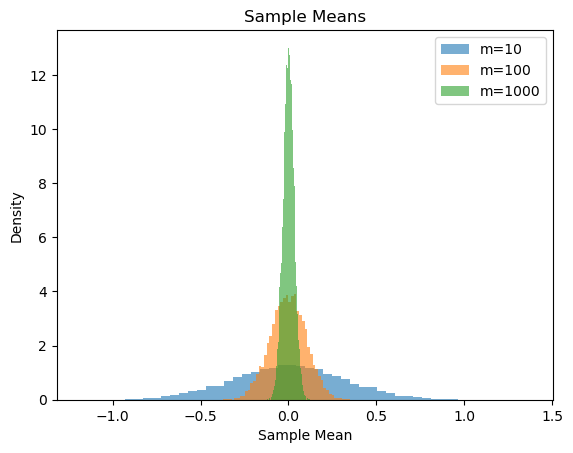

In [123]:
# Defining the number of samples
n_samples = 10000

# Generate samples and plot histograms for different values of 'm'
m_values = [10, 100, 1000]

sample_means= []
i=0
#Iterating m to calculate sample mean for each value
for m in m_values:
    sample_means.append(sample_mean(m, n_samples))
#Plot the graph of each sample mean calculated    
    plt.hist(sample_means[i], bins=50, density=True, alpha=0.6, label=f'm={m}')
    plt.title('Sample Means')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    i=i+1
plt.show()

**Ques4(b):**-• By solving the first question of the Theory part, write a class called sample_mean_distribution
whose constructor takes an integer m as input and implements the probability measure
Normal(0, 1)m ≜
1
m
Xm
i=1
Normal(0, 1)
in other words, the distribution of the length-m estimator of the mean. Instantiate the objects
sample_mean_distribution(10), sample_mean_distribution(100), sample_mean_distribution(1000)
and plot their PDFs.

**Note** In the below code we will be using following 2 properties followed by normal distributions
• the sum of two normals is normal: Normal(µ1, σ1) + Normal(µ2, σ2) = Normal (
µ1 + µ,sqrt(σ1^2+σ2^2)2
2
2

• re-scaling a normal gives a normal: for any α > 0, α · Normal(µ, σ) = Normal(αµ, ασ)

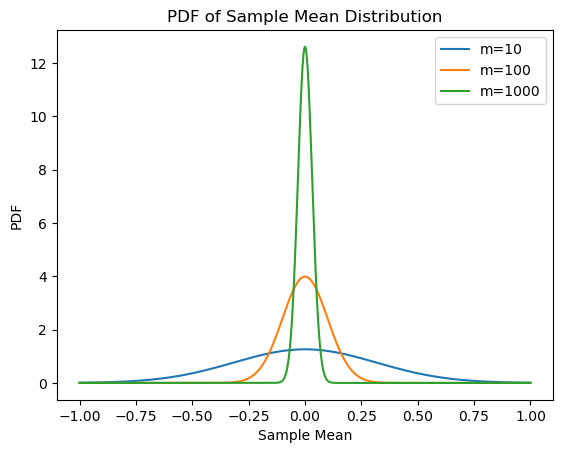

In [134]:
#define the class sample_mean
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m

    def pdf(self, x):
        #Here according to second property self.m should be greater than zero
        if self.m > 0:
            #Here we divide by square root of m because of the 2 properties followed by normal distributions when taking the sum of sample means
            return norm.pdf(x, loc=0, scale=1/np.sqrt(self.m)) 
        else:
            return 0

pdf_values=[]
i=0
#Calculating and plotting the pdf values for each m_value i.e. 10,100,1000
for m in m_values:
    dist = sample_mean_distribution(m)
    x = np.linspace(-1, 1, 1000)  # Define the range of x values
    pdf_values.append([dist.pdf(xi) for xi in x])
    plt.plot(x, pdf_values[i], label=f'm={m}')
    i=i+1
plt.title('PDF of Sample Mean Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('PDF')
plt.legend()
plt.show()


**Ques4(c):**-Compare (a) the 3 histograms, (b) the 3 PDFs and (c) the histograms with the PDF. What conclusions
do you draw?

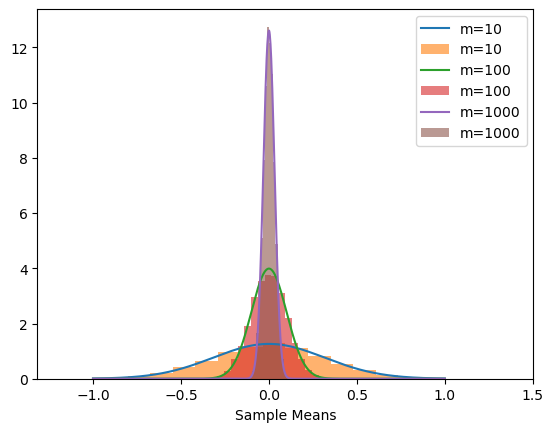

In [140]:
#Plotting the above two graphs together to clearly see the superimposition of both graphs on each other
x = np.linspace(-1, 1, 1000)  # Define the range of x values
for i,m in zip (range(0,3),m_values):
    plt.plot(x, pdf_values[i],label=f'm={m}')
    plt.hist(sample_means[i], bins=20, density=True, alpha=0.6, label=f'm={m}')
    plt.legend()
plt.xlabel('Sample Means')
plt.show()

After plotting all the graphs together we can observe that
As the value of m increases, the histograms become narrower and more closely resemble a normal distribution. This aligns with the Central Limit Theorem, which states that the sample mean of a sufficiently large sample from any population will be approximately normally distributed.
The PDFs for the sample mean distributions also become narrower and more concentrated around the mean as m increases.
The histograms with the PDFs demonstrate that the histograms converge to the shape of the PDFs as the sample size (m) increases, further validating the Central Limit Theorem.